In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [2]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target.astype('int64')

In [3]:
print(X.shape, y.shape) 

(70000, 784) (70000,)


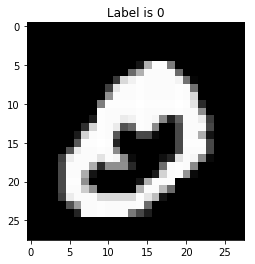

In [4]:
index = 6 #15000, 28999, 67345
image = X[index] .reshape((28, 28))
plt.title('Label is ' + str(y[index]))
plt.imshow(image, cmap='gray')

In [5]:
X = X / 255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
enc = OneHotEncoder(sparse=False)
y_hot = enc.fit_transform(y.reshape(-1, 1))
y_train_hot = enc.transform(y_train.reshape(-1, 1))
y_hot.shape

(70000, 10)

In [8]:
y_hot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
linear = LinearRegression()
linear.fit(X_train, y_train_hot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# use trained model to predict both train and test sets
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# print accuracies
print('train acc: ', accuracy_score(y_train_pred.argmax(axis=1), y_train))
print('test acc: ', accuracy_score(y_test_pred.argmax(axis=1), y_test))

train acc:  0.859657142857
test acc:  0.851085714286


In [54]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train_hot)
print('train acc: ', accuracy_score(ridge.predict(X_train).argmax(axis=1), y_train))
print('test acc: ', accuracy_score(ridge.predict(X_test).argmax(axis=1), y_test))

train acc:  0.860095238095
test acc:  0.854057142857


In [55]:
logreg = LogisticRegression(C=0.01, multi_class='multinomial', solver='saga', tol=0.1)
logreg.fit(X_train, y_train)
print('train acc: ', accuracy_score(logreg.predict(X_train), y_train))
print('test acc: ', accuracy_score(logreg.predict(X_test), y_test))

train acc:  0.92020952381
test acc:  0.913371428571


In [59]:

randomForest = RandomForestClassifier(n_estimators=70, )
randomForest.fit(X_train,y_train)
print('train acc: ', accuracy_score(randomForest.predict(X_train), y_train))
print('test acc: ', accuracy_score(randomForest.predict(X_test), y_test))

train acc:  1.0
test acc:  0.966114285714


In [61]:
pca = PCA(n_components=0.8, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [62]:
X_train_pca.shape

(52500, 43)

In [47]:
lsvc = LinearSVC(dual=False, tol=0.01)
lsvc.fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(lsvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(lsvc.predict(X_test_pca), y_test))

train acc:  0.894628571429
test acc:  0.888628571429


In [ ]:
psvc = SVC(kernel='poly', degree=6, tol=0.01, cache_size=4000)
psvc.fit(X_train, y_train)
print('train acc: ', accuracy_score(psvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(psvc.predict(X_test_pca), y_test))

In [ ]:
rsvc = SVC(kernel='rbf', tol=0.01, cache_size=4000)
rsvc.fit(X_train, y_train)
print('train acc: ', accuracy_score(rsvc.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(rsvc.predict(X_test_pca), y_test))

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', verbose=1)
nn.fit(X_train, y_train)
print('train acc: ', accuracy_score(nn.predict(X_train_pca), y_train))
print('test acc: ', accuracy_score(nn.predict(X_test_pca), y_test))